# dl.ai NLP 1.3-4: semantic search with word vectors
*deeplearning.ai NLP specialization (course)1.(weeks)3-4 notes by Samson Zhang*

Weeks 3 and 4 of course 1 were light because they cover word vectors -- without diving into how to actually train word vectors, instead just explaining them at a high level and supplying a set of pre-trained vectors "obtained through a machine learning algorithm." Week 4 is interesting though because it applies word vectors to machine translation and semantic search, the latter of which I'm very interested in!

## word/word, word/doc and bag-of-words vectorizations

A simple example of a way to vectorize words is to represent them by the contexts in which they appear, either at the word or document level.

At the word level, a word can be vectorized by the frequency at which other words appear within a certain amount of words of it in a given corpus:

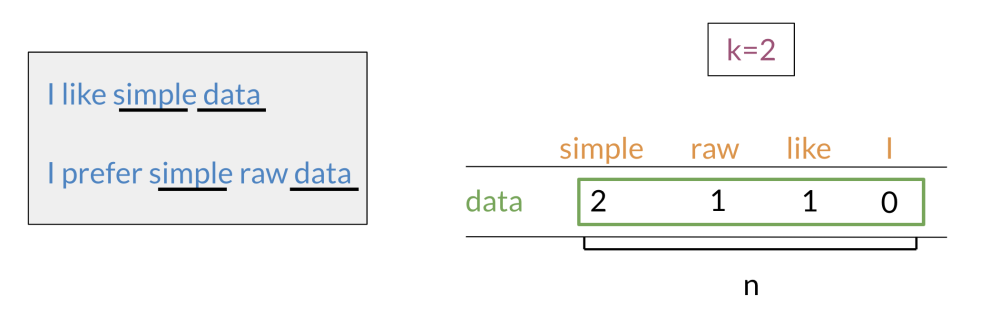

At the document level, a word can be vectorized by the frequency at which it appears in different kinds of documents in a given corpus:

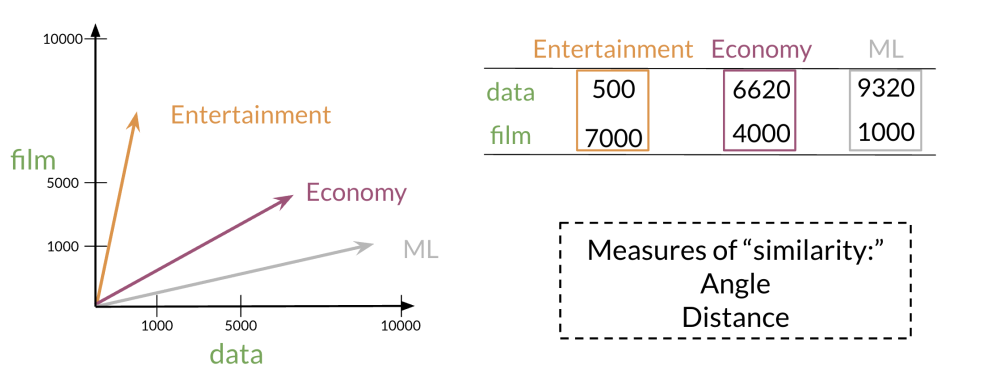

The point is to obtain same-sized vectors for each word so that their similarities can be compared. For example, you can find the cosine similarity between two vectors to get a similarity metric between 0 and 1:

$$\cos(\beta) = \frac{\hat{v} \cdot \hat{w}}{||\hat{v}|| ||\hat{w}||} \quad \bigg| \quad ||\vec{v}|| = \sqrt{\sum^n_{i=1} |v_i|^2}$$

Visually:

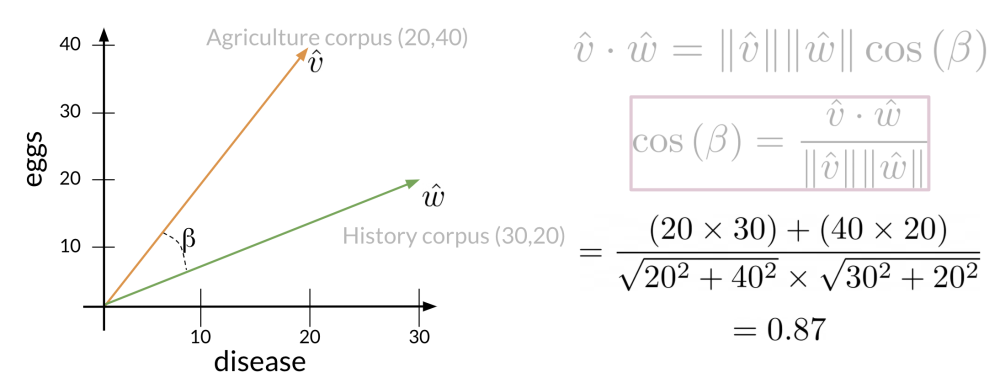

This is how [Semantle](https://semantle.com/) works (I'm pretty sure), using Google's `word2vec` embeddings (according to Semantle's FAQ).

Word vectors can also be combined to create a basic "bag-of-words" vectorization of a sentence -- simply by adding up all the word vectors in it. This doesn't take into account word order, though, so its practical uses are limited.

## party trick: machine translation

The classic party trick illustration of how word vectors are useful is that relationships between words can be represented as vector differences:

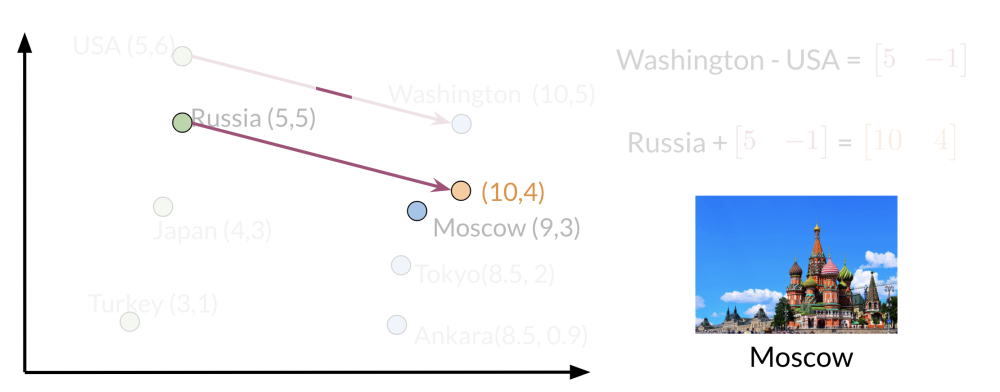

A more interesting example in my opinion is to apply linear transformations to vectors as a simple machine translation algorithm.

For example, say you have embeddings for English and French words, as well as a labeled dataset of English-French word pairs.

Then it's straightforward to use gradient descent to find a matrix that transforms from English embeddings to French ones, thus creating a translation algorithm much more powerful and efficient than a hard-coded dictionary.

$$
\begin{align*}
&\text{find} R \: | \: XR &&\approx Y \\
&\text{loss} &&= ||XR-Y||_F \: | \: ||M|| = \sqrt{\sum{\text{each value in the matrix}^2}}\\
&\text{gradient} &&= \frac{d}{dr} \text{loss} = \frac{2}{m} (X^T (XR-Y)) \\
&\text{update} R &&:= R - \alpha \cdot \text{gradient} \\
\end{align*}
$$

The Coursera assignment gets students to implement the entire machine translation model and train it, but being able to translate individual words doesn't seem super useful, so I skipped over it.

## efficient similarity searching: approximate k-nearest neighbors and hash tables

The last part of the course dives into how to perform an efficient search over a huge word space -- with hash tables and approximate k-nearest neighbors algorithms.

Specifically, the course covers "locality-sensitive hashing", which draws "planes" (lines in 2D space, planes in 3D space, hyperplanes in higher dimensional space) to group similar items together:

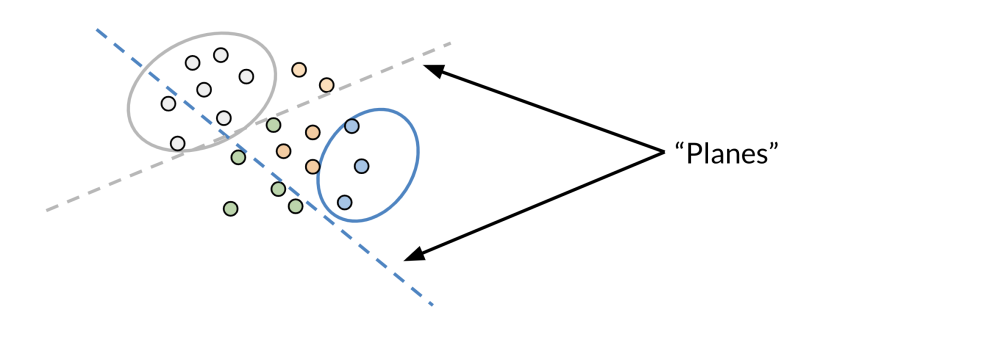

Calculating whether a vector is on one side of the plane or not is as simple as taking the sign of the dot product of that vector and the normal vector of the plane. If the dot product is positive, it's on one side of the plane; if negative, it's on the other.

For multiple planes, the location of a given vector can be hashed essentially in binary, using the formula $\sum^H_i 2^i h_i$, where $h_i$ is 1 if the dot product for the corresponding plane is positive and 0 if negative. The result is a single integer that encodes the vector's relation to each plane.

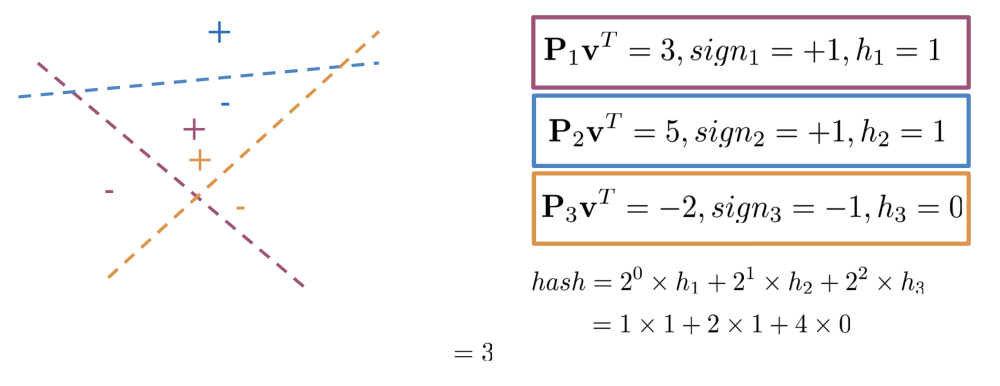

For a more efficient search, then, first generate multiple sets of random planes (this is the approximate k-nearest neighbors algorithm). Then take your search vector, calculate its hash value for each set of planes, and search only among the items that have the same hash values.

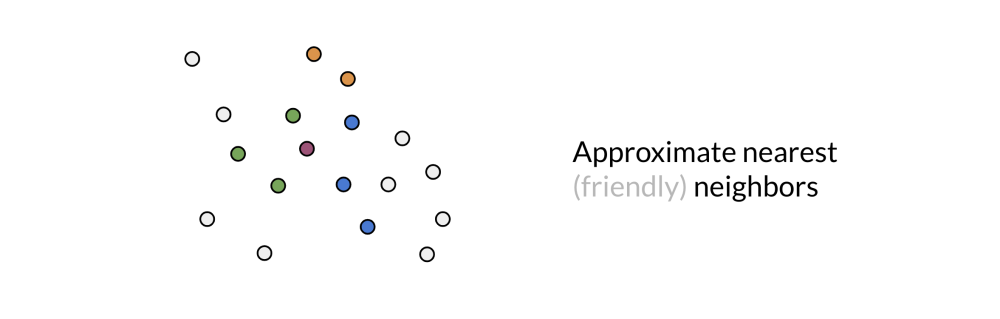

This algorithm drastically cuts down on the amount of cosine similarities that need to be calculated for a search.
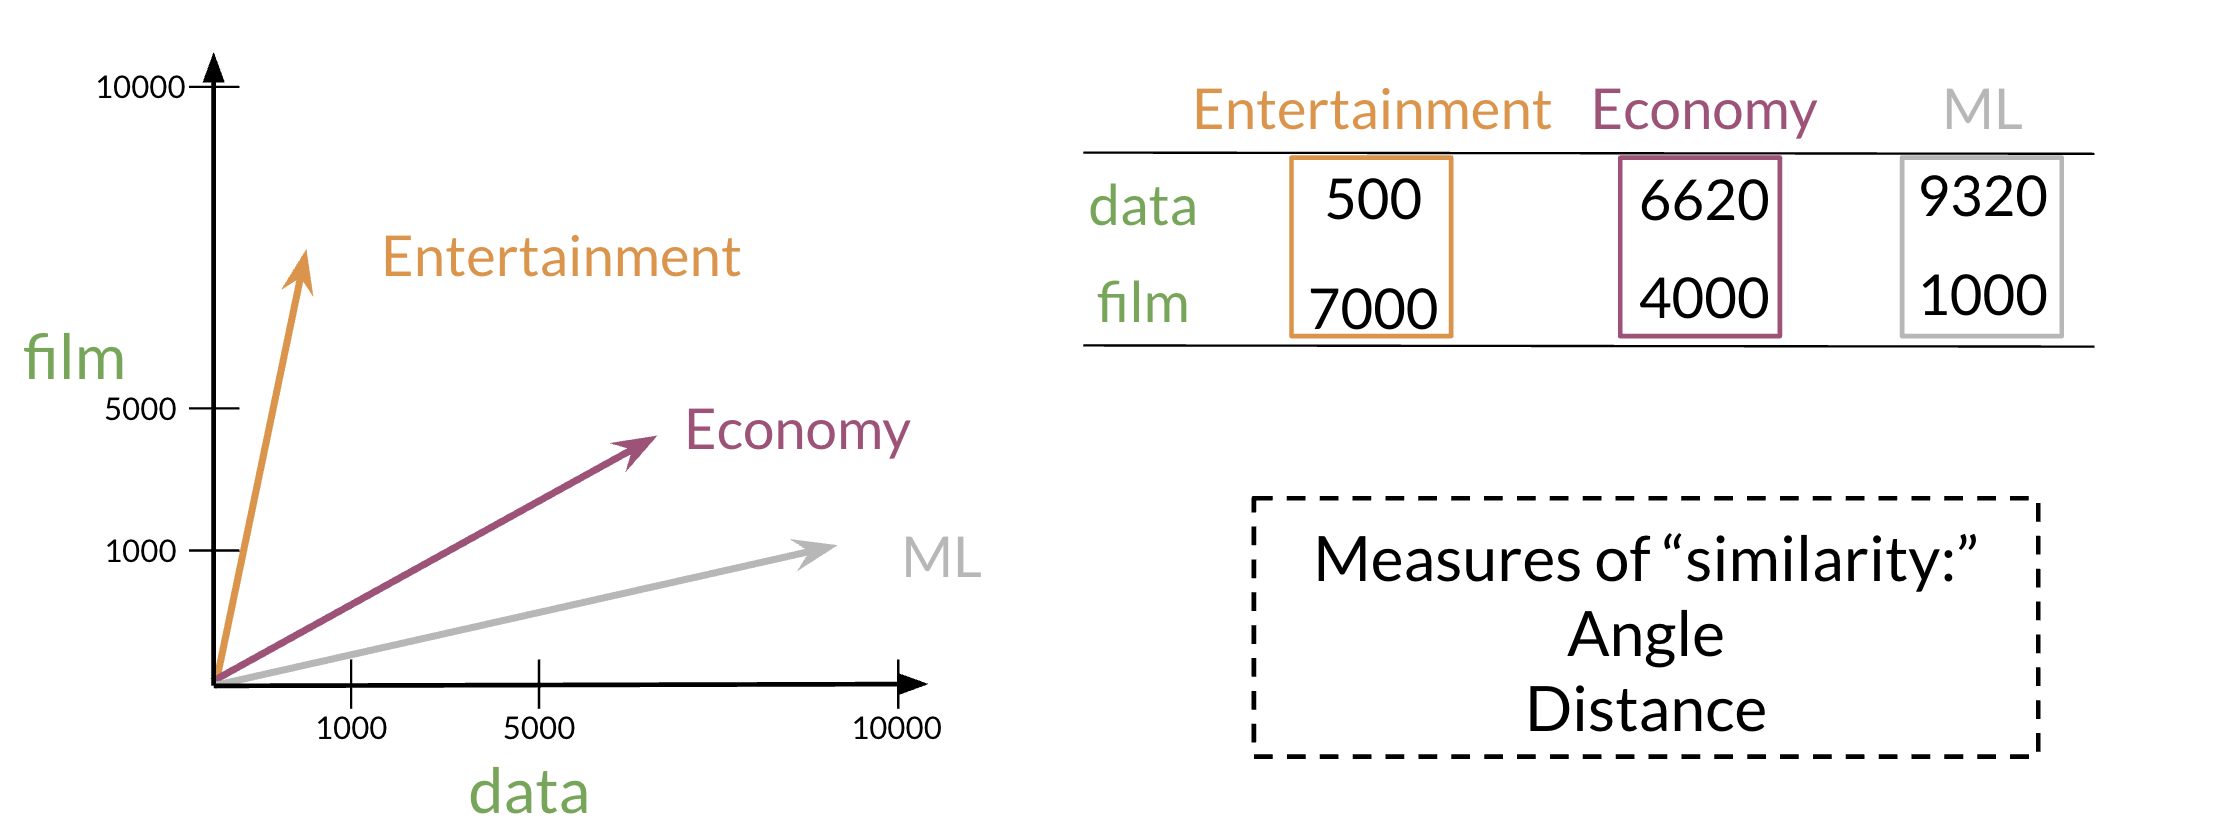
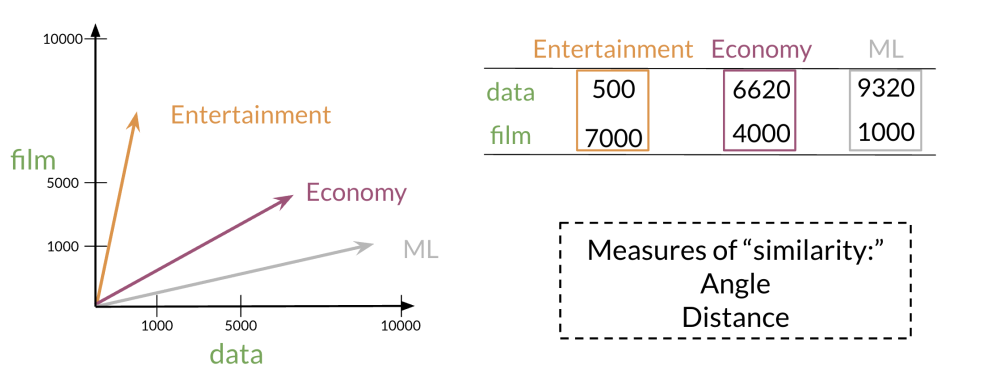
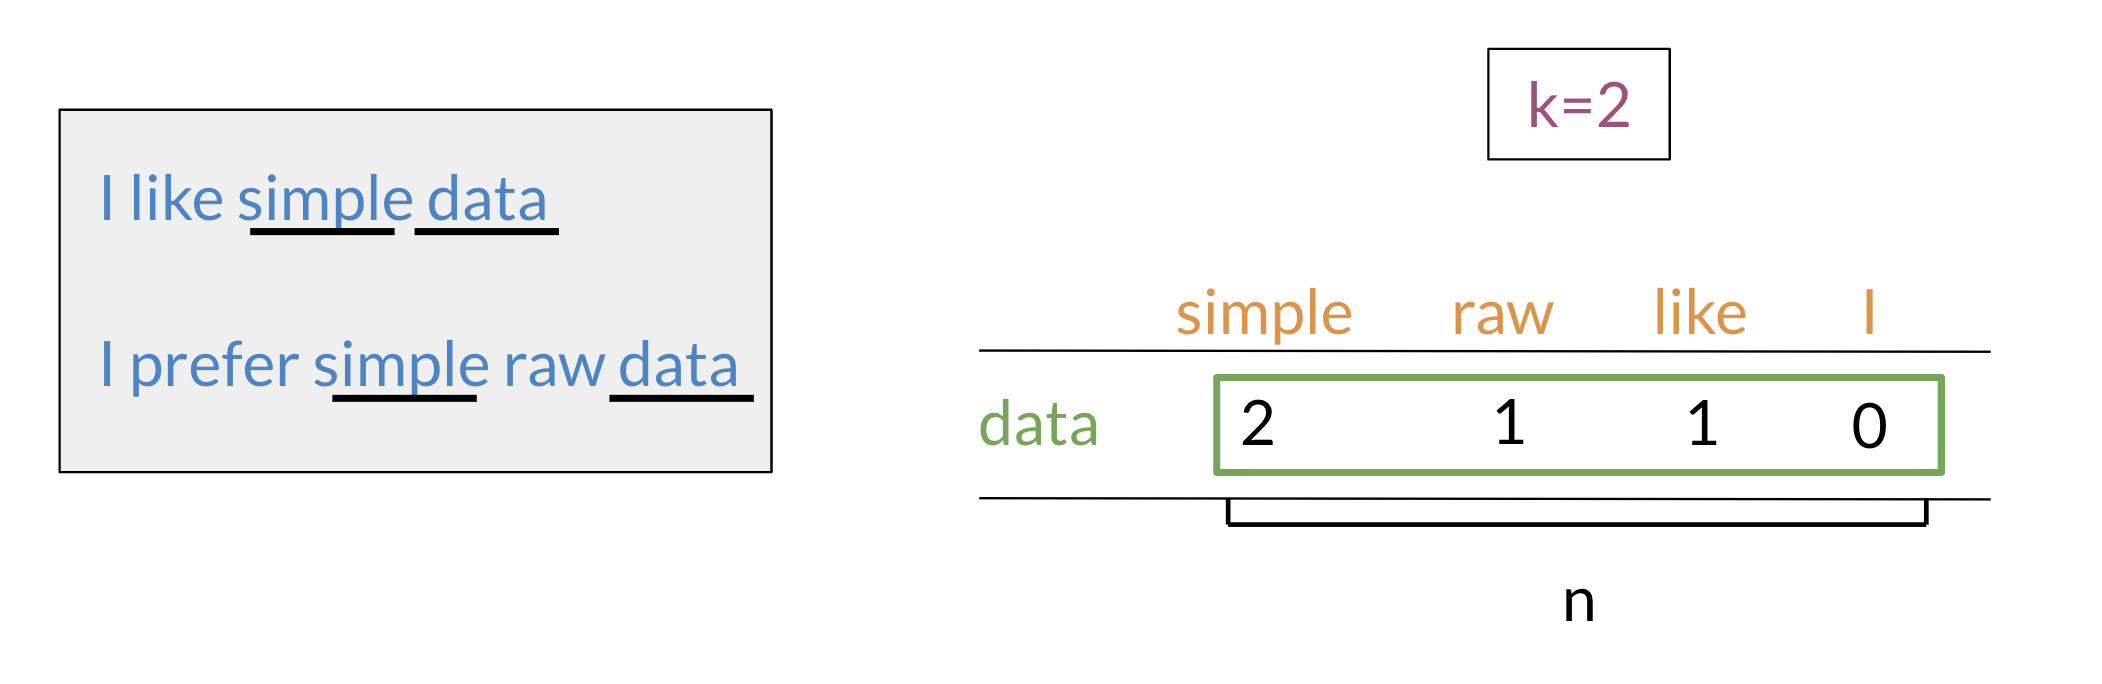
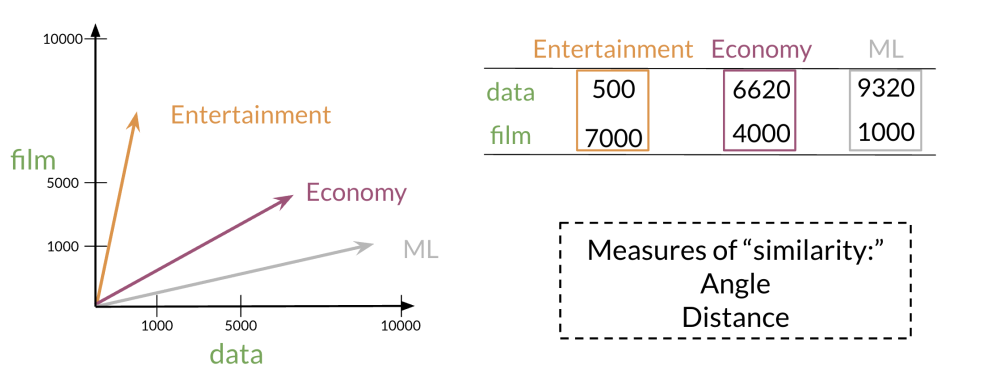